감성 분석(Sentiment Analysis)
=====
에브리타임 강의평 감성 분석
-----
이번 시간에는 에브리타임 강의평으로 감성 분석을 해보겠습니다.<br>
보통은 영화 리뷰 데이터로 감성 분석을 많이 하는데, 기존 스터디 자료였던 강의평을 사용해보도록 합니다.<br>
새로 크롤링을 할까 하다가, 실습내용에 변화는 없을 것 같아 기존 자료를 사용하는점 양해부탁드립니다!<br>

감성 분석은 결국 텍스트 분류의 문제입니다. 그 중에서도 긍정과 부정으로만 나뉘는 <b>이진 분류(Binary Classification)</b>입니다.<br>
이진 분류를 할 수 있는 모델은 다양합니다. 오늘은 머신러닝 모델 중 하나인 Logistic Regression을 통해 학습시켜보고자 합니다.<br>
기본적인 프로세스는 다음과 같습니다.
- 데이터 전처리
- 텍스트 전처리
- TF-IDF 벡터화
- Logistic Regression 학습

## 윈도우 사용자 Mecab 설치 방법

1. mecab-ko-msvc 설치 <br>
 1-1. 링크 클릭 https://github.com/Pusnow/mecab-ko-msvc/releases/tag/release-0.9.2-msvc-3 <br>
 1-2. 윈도우 버전 확인 후 32비트/64비트 선택하여 다운로드 <br>
 1-3. 본인의 C드라이브에 mecab폴더 만들기 >> "C:/mecab" <br>
 1-4. 1-2에서 다운 받은 zip를 mecab폴더에 압축풀기 <br>
 
2. mecab-ko-dic-msvc.zip 설치 <br>
 2-1. 링크 클릭 https://github.com/Pusnow/mecab-ko-dic-msvc/releases/tag/mecab-ko-dic-2.1.1-20180720-msvc <br>
 2-2. 사전 다운로드 'mecab-ko-dic-msvc.zip' <br>
 2-3 "C:/mecab" 폴더에 압축풀기 <br>


3. python wheel 설치하기
 3-1. 링크 클릭 https://github.com/Pusnow/mecab-python-msvc/releases/tag/mecab_python-0.996_ko_0.9.2_msvc-2 <br>
 3-2. 파이썬 및 윈도우 버전 확인 후 맞는 whl 다운로드 <br>
   ex. 윈도우 64bit, 파이썬 3.7버전 >> mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl <br>
 3-3. 다운로드 받은 파일을 site-package 폴더에 옮겨놓기 아나콘다 사용자 경우 대부분 C:\Users\HONG\Anaconda3\Lib\site-packages <br>
 3-4. anaconda prompt를 킨 후 site-package 폴더로 이동 후 pip로 whl 설치 <br>
   > cd C:\Users\HONG\Anaconda3\Lib\site-packages (본인의 site_packages 경로로 바꿔주세요) <br>
   > pip install mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl <br>
   
설치가 성공적으로 되었으면 anaconda prompt를 종료 후 재실행 혹은 다시 경로를 본인 로컬 경로로 지정 후 jupyter 켜주시면 됩니다 :)

* 출처: https://cleancode-ws.tistory.com/97

In [1]:
# 본인의 site-packages 폴더 찾는법!! 

import site; site.getsitepackages()

['C:\\Users\\HONG\\Anaconda3',
 'C:\\Users\\HONG\\Anaconda3\\lib\\site-packages']

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

warnings.filterwarnings("ignore")

In [3]:
# 디렉토리 확인
%ls

 C 드라이브의 볼륨: SSD
 볼륨 일련 번호: 786C-ABF7

 C:\Users\HONG\Desktop\HONGYP\BOAZ\New 텍스트마이닝\5주차 디렉터리

2020-08-21  오후 07:34    <DIR>          .
2020-08-21  오후 07:34    <DIR>          ..
2020-08-20  오후 01:49    <DIR>          .ipynb_checkpoints
2020-08-20  오후 03:35         4,018,542 5주차 배포파일.zip
2020-08-20  오후 03:35         6,520,081 5주차 실습파일.zip
2020-08-21  오후 07:34            25,675 8강_감성 분석 실습용.ipynb
2020-08-20  오후 03:57           436,324 8강_감성 분석.ipynb
2020-06-03  오후 08:16         2,145,272 font.ttf
2020-05-02  오후 08:57         1,488,052 matfont.ttf
2020-08-19  오후 02:54            17,107 negative.png
2020-05-02  오후 11:07            14,828 positive.png
2020-06-03  오후 08:16         2,203,948 wcfont.ttf
2020-08-19  오후 03:56         3,742,754 감성분석 ppt.pptx
2020-08-20  오후 02:56            61,886 긍정.png
2020-08-20  오후 02:56            57,363 부정.png
2020-08-20  오후 02:19           141,463 시각화.png
2020-02-22  오후 08:22        14,750,688 에브리타임 강의평_2020-1.csv
              14개 파일          35,623,983 바이

In [4]:
# 데이터 불러오기
df = pd.read_csv('에브리타임 강의평_2020-1.csv', index_col = 0)

In [5]:
# 데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28112 entries, 0 to 28111
Data columns (total 7 columns):
교과목명     28112 non-null object
교수명      28110 non-null object
강의평      28112 non-null float64
평점       28112 non-null int64
수강학기     28101 non-null object
내용       28112 non-null object
강의평링크    28112 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [6]:
# 데이터 확인하기
df.head(10)

,교과목명,교수명,강의평,평점,수강학기,내용,강의평링크
0,생산및운영관리,김효진,2.89,3,19년 2학기 수강자,무엇보다도 확실한건 -도 주신다는 겁니다.상대평가로 진행된 학기에 수업 들었는데 A...,http://everytime.co.kr//lecture/view/1850948
1,생산및운영관리,김효진,2.89,1,19년 2학기 수강자,연대와서 최악의 강의 교수님이 강의력이 좋은것도 아니고 학점을 잘 주는것도 아니고 ...,http://everytime.co.kr//lecture/view/1850948
2,생산및운영관리,김효진,2.89,1,19년 2학기 수강자,교수님은 수업 준비를 안하시나? 라는 생각이 들 정도로 말도 잘 못 하심. 착하니까...,http://everytime.co.kr//lecture/view/1850948
3,생산및운영관리,김효진,2.89,2,19년 2학기 수강자,교수님 강의 잘 못하심. 그냥 교재사서 그거 읽는 것이 이해가 빠름.학생들 대답 없...,http://everytime.co.kr//lecture/view/1850948
4,생산및운영관리,김효진,2.89,3,19년 2학기 수강자,교수님 착하시지만 강의력은...그닥... 하지만 강의 하나도 안들어도 ppt만 보...,http://everytime.co.kr//lecture/view/1850948
5,생산및운영관리,김효진,2.89,3,19년 2학기 수강자,1. 수업내용수업 내용은 무난합니다. 내용은 다 영어지만 설명은 한국어라서 이해하는...,http://everytime.co.kr//lecture/view/1850948
6,생산및운영관리,김효진,2.89,2,19년 2학기 수강자,수업때도 느꼈지만 녹음 들으면서 다시 느낌교수님은 친절하나 설명전달 최악임그래도 중...,http://everytime.co.kr//lecture/view/1850948
7,생산및운영관리,김효진,2.89,2,18년 2학기 수강자,2019 여름 계절로 들음.교수님 친절하신거 말고 좋은 게 없음.강의력 별로임 설명...,http://everytime.co.kr//lecture/view/1850948
8,생산및운영관리,김효진,2.89,3,18년 2학기 수강자,2019 여름계절학기로 들었습니다.교수님은 정말정말 친절하시고 좋은 분이시나 강의력...,http://everytime.co.kr//lecture/view/1850948
9,생산및운영관리,김효진,2.89,2,18년 2학기 수강자,"계절학기로 들었습니다.영어강의였는데 발음이든, 설명이든 수업을 도저히 알아먹을 수 ...",http://everytime.co.kr//lecture/view/1850948


In [7]:
# 결측치 제거
df.dropna(inplace = True)

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm



# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# 한글폰트 사용
# 본인이 원하는 한글폰트를 plot 그릴 때 사용할 수 있습니다.
fontpath = r'C:\Users\HONG\Desktop\HONGYP\BOAZ\New 텍스트마이닝\5주차\matfont.ttf'
titlepath = r'C:\Users\HONG\Desktop\HONGYP\BOAZ\New 텍스트마이닝\5주차\font.ttf'
fontprop = fm.FontProperties(fname=fontpath, size = 15)
titleprop = fm.FontProperties(fname=titlepath, size = 20)

Text(0.5, 0, '평점')

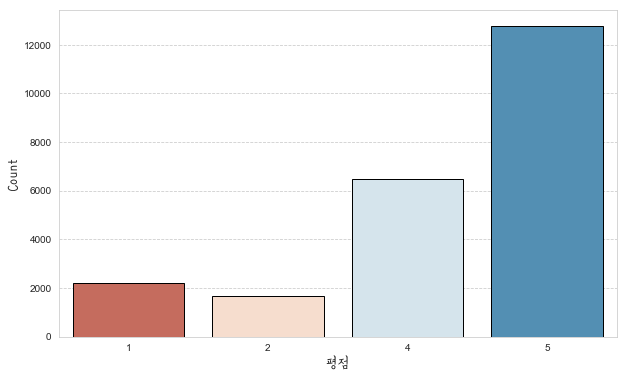

In [12]:
# 평점 별 개수 확인
f, ax = plt.subplots(figsize = (10,6))
ax.grid(axis = "y", linestyle = "--")

sns.set_style("whitegrid")
sns.countplot('평점', data = df, palette = "RdBu", edgecolor = "black", linewidth = 1, ax = ax)
plt.ylabel("Count", fontproperties = fontprop)
plt.xlabel("평점", fontproperties = fontprop)

In [11]:
# 평점 3점 제거
df = df[df["평점"] != 3]
df.reset_index(drop = True, inplace = True)

In [13]:
# 감정 라벨링
df["label"] = df["평점"].apply(lambda x:1 if x>3 else 0)

In [16]:
# 새로운 토크나이저 Mecab을 불러옵니다.
# 보통 토크나이저 안에 파라미터를 넣어주지 않지만 Mecab의 경우 별도로 다운받은 파일이기 때문에 path를 설정해주어야 합니다.

import konlpy.tag
mecab = konlpy.tag.Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [15]:
import konlpy.tag
okt = konlpy.tag.Okt()

## 형태소 기준 전처리

- morphs()를 사용하여 형태소 기준으로 토크나이징 해줍니다.

In [20]:
import re

# 특수문자 제거
def delete(x):
    return re.sub("[^\w\s]", " ", x)

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result

In [21]:
# 내용 전처리
stopword_list = ["어요", "습니다", "셔서", "지만", "으시", "아요", "해요", "입니다", "됩니다", "교수", "교수님", "내고", 
                 "내요", "라고", "라는", "는지", "라는", "라고", "이걸", "이거", "십니다", "합니다"]

df['내용_형태소'] = df['내용'].apply(lambda x: mecab.morphs(x))
df['내용_형태소'] = df["내용_형태소"].apply(remove_stopwords).apply(lambda x: ' '.join(x))
df['내용_형태소'] = df['내용_형태소'].apply(delete)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# 데이터 스플릿(훈련 데이터와 테스트 데이터)
train_texts, test_texts, train_labels, test_labels = train_test_split(df["내용_형태소"], df["label"], test_size = 0.3, random_state = 0)

In [24]:
# train_texts 확인
train_texts

20973    힘들      삶 의 질 포기 하 고 공부 벌레 될 사람 들 만 들 으세요   진짜...
856      아침 채플 이 라 조금 피곤 했 던 점 을 빼 면     ㅎㅎ 전반 적 으로 무난 ...
11117    인크레더블 에 나오 는 쫄쫄이 옷 만들 어 주 는 디자이너   닮 으셨 음   비하...
20352    진짜 노 답 꼰대 발언 너무 많 아 자기 문제지 도 못 품 한 숨 푹푹 어둠 자식 ...
9188     님 이 매우 매우 친절 하 시 고 수업 도 흥미 롭   조 모임 은 물론 케 바케 ...
21374    최악 최악 최악 강의 평 좋 길래 들 었 는데 제 가 그 최악 의 멘 티 들 을 만...
5594                 그저 빛      정말 정말 정말 정말 너무너무 좋 으신 분    
16203    개인 적 으로 너무 만족 했 던 수업 중 하나 이 다   님 도 친절 하 시 고 국...
4563     정말 이런 꿀 수업 어디 서 도 찾아보 기 힘들 다   등록금 이 아깝 지 않 고 ...
12457    시험 문제 가 좀 생뚱 맞 기 는 했   수업 시간 에 했 던 내용 이 기 는 했 ...
7673     아래 강의 평 에 이름 이 연세 와 비슷 하 다 개 웃기 네 ㅋㅋ ㅋㅋ 당신 이 이...
12596    그냥 천사 심     과제 가 조금 있 크 게 힘든 것 도 아니 고 학점 이렇 게 ...
20728    밑 에 평점 높 은 거 보고 기겁 함   공대 생 이 면 진짜 비추 이게 열역학 인...
9141     생산 은 박승재 님 이     정말 이 지 이번 학기 유일 한 힐링 과목 영강 이 ...
9537     좋 으신 분 인데 다음 학기 에 는 안 여 시 는 것 같 네요 ㅠㅠㅠㅜ교수님 너무 ...
14248    최고 의 강의   조 모임 도 없 고 강의 력 도 이 정도 면 사회 학과 를 넘 어...
5991     사실 시 를 쓰 는 실력 을 수업 으로 향상 시킬 수 있 다고 믿 지 않 았 음  .

In [28]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(min_df = 1, norm = "l2", ngram_range = (1, 1))
train_features = vectorizer.fit_transform(train_texts)

In [30]:
# LogisticRegression
model = LogisticRegression(C = 0.3, penalty = "l2")

In [31]:
# LogisticRegression 모델에 훈련 데이터 학습
model.fit(train_features, train_labels)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# 테스트 데이터 벡터화
test_features = vectorizer.transform(test_texts)

In [33]:
# 훈련시킨 모델로 테스트 데이터 예측
model.predict(test_features)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
# 정확도 테스트
pred_labels = model.predict(test_features)
print('잘못 분류된 강의평: {} out of {}'.format((pred_labels != test_labels).sum(),len(test_labels)))
print('Accuracy: %.2f' % accuracy_score(test_labels, pred_labels))

잘못 분류된 강의평: 983 out of 6943
Accuracy: 0.86


In [35]:
# 사용된 단어 리스트
vocablist = [word for word, _ in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[0])]

In [36]:
# 가중치 계산
coefficients = model.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient값이 존재

In [38]:
# 긍정단어 TOP 50
for word, coef in sorted_coefficients[:50]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

재밌 (3.026)
부담 (2.720)
최고 (2.629)
친절 (2.582)
이쁠 (2.460)
다만 (2.284)
개꿀 (1.847)
조금 (1.835)
열심히 (1.807)
사랑 (1.644)
재미있 (1.565)
천사 (1.550)
그래도 (1.499)
만족 (1.496)
무난 (1.481)
많이 (1.439)
정도 (1.431)
충분히 (1.379)
정말 (1.362)
괜찮 (1.331)
열정 (1.315)
중요 (1.287)
깔끔 (1.268)
착하 (1.252)
께서 (1.249)
만큼 (1.245)
감사 (1.210)
걱정 (1.203)
어렵 (1.157)
중간 (1.154)
에이 (1.125)
가끔 (1.107)
채플 (1.090)
생각 (1.088)
무조건 (1.082)
복습 (1.062)
힐링 (1.051)
흥미 (1.047)
귀여우 (1.026)
설명 (1.016)
신다 (1.015)
가르쳐 (1.014)
편하 (1.014)
들으면 (1.006)
기말 (1.000)
주심 (0.972)
난이도 (0.965)
쁠몰 (0.937)
강추 (0.921)
으세요 (0.921)


In [39]:
# 부정단어 TOP 50
for word, coef in sorted_coefficients[-50:]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

장점 (-0.893)
도망치 (-0.904)
낭비 (-0.917)
채점 (-0.940)
내내 (-0.943)
심지어 (-0.952)
애매 (-0.968)
본인 (-0.978)
조교 (-0.978)
다시 (-0.982)
스트레스 (-0.986)
이런 (-0.999)
아까운 (-1.010)
결국 (-1.012)
다가 (-1.052)
합창 (-1.065)
인지 (-1.078)
아깝 (-1.093)
까지 (-1.102)
무슨 (-1.133)
갑자기 (-1.139)
굳이 (-1.157)
도망가 (-1.173)
후회 (-1.191)
그냥 (-1.209)
꼰대 (-1.210)
진짜 (-1.226)
도대체 (-1.272)
다른 (-1.274)
깐깐 (-1.278)
혼자 (-1.285)
랜덤 (-1.323)
피하 (-1.345)
짜증 (-1.347)
자기 (-1.486)
등록금 (-1.546)
건지 (-1.730)
아니 (-1.779)
철회 (-1.789)
독학 (-1.906)
쓰레기 (-1.944)
절대 (-2.010)
기준 (-2.118)
제발 (-2.173)
차라리 (-2.180)
별로 (-2.424)
비추 (-2.712)
모르 (-2.939)
마세요 (-3.080)
최악 (-3.463)


## 명사 기준 전처리

- ppt 내용에서 감성분석은 명사보다 형용사/부사가 더 중요한 역할을 한다고 말씀드렸습니다.
- 그럼 명사기준으로 토크나이징 했을 때 분류모델의 성능이 어떻게 변화하는지 살펴보도록 하겠습니다.

In [40]:
df['내용_명사'] = df['내용'].apply(lambda x: mecab.nouns(x)).apply(lambda x: ' '.join(x))
df['내용_명사'] = df['내용_명사'].apply(delete)

In [41]:
# 데이터 스플릿(훈련 데이터와 테스트 데이터)
train_texts, test_texts, train_labels, test_labels = train_test_split(df["내용_명사"], df["label"], test_size = 0.3, random_state = 0)

In [18]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(min_df = 1, norm = "l2", ngram_range = (1, 1))
train_features = vectorizer.fit_transform(train_texts)

In [42]:
# LogisticRegression 모델에 훈련 데이터 학습
model.fit(train_features, train_labels)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# 테스트 데이터 벡터화
test_features = vectorizer.transform(test_texts)

In [46]:
# 훈련시킨 모델로 테스트 데이터 예측
model.predict(test_features)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
# 정확도 테스트
pred_labels = model.predict(test_features)
print('잘못 분류된 강의평: {} out of {}'.format((pred_labels != test_labels).sum(),len(test_labels)))
print('Accuracy: %.2f' % accuracy_score(test_labels, pred_labels))

잘못 분류된 강의평: 1072 out of 6943
Accuracy: 0.85


In [48]:
# 사용된 단어
vocablist = [word for word, _ in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[0])]

In [49]:
# 가중치 계산
coefficients = model.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재

In [50]:
# 긍정단어 TOP 50
wc_list_po = []

for word, coef in sorted_coefficients[:50]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))
    wc = vocablist[word], coef
    wc_list_po.append(wc)

재밌 (3.026)
부담 (2.720)
최고 (2.629)
친절 (2.582)
이쁠 (2.460)
다만 (2.284)
개꿀 (1.847)
조금 (1.835)
열심히 (1.807)
사랑 (1.644)
재미있 (1.565)
천사 (1.550)
그래도 (1.499)
만족 (1.496)
무난 (1.481)
많이 (1.439)
정도 (1.431)
충분히 (1.379)
정말 (1.362)
괜찮 (1.331)
열정 (1.315)
중요 (1.287)
깔끔 (1.268)
착하 (1.252)
께서 (1.249)
만큼 (1.245)
감사 (1.210)
걱정 (1.203)
어렵 (1.157)
중간 (1.154)
에이 (1.125)
가끔 (1.107)
채플 (1.090)
생각 (1.088)
무조건 (1.082)
복습 (1.062)
힐링 (1.051)
흥미 (1.047)
귀여우 (1.026)
설명 (1.016)
신다 (1.015)
가르쳐 (1.014)
편하 (1.014)
들으면 (1.006)
기말 (1.000)
주심 (0.972)
난이도 (0.965)
쁠몰 (0.937)
강추 (0.921)
으세요 (0.921)


In [51]:
# 시각화를 위해 DataFrame으로 만들어줌
df_po = pd.DataFrame(data = wc_list_po, columns = ["단어", "계수"])

In [52]:
# 부정단어 TOP 50
wc_list_ne = []

for word, coef in sorted_coefficients[-50:]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))
    wc = vocablist[word], coef
    wc_list_ne.append(wc)

장점 (-0.893)
도망치 (-0.904)
낭비 (-0.917)
채점 (-0.940)
내내 (-0.943)
심지어 (-0.952)
애매 (-0.968)
본인 (-0.978)
조교 (-0.978)
다시 (-0.982)
스트레스 (-0.986)
이런 (-0.999)
아까운 (-1.010)
결국 (-1.012)
다가 (-1.052)
합창 (-1.065)
인지 (-1.078)
아깝 (-1.093)
까지 (-1.102)
무슨 (-1.133)
갑자기 (-1.139)
굳이 (-1.157)
도망가 (-1.173)
후회 (-1.191)
그냥 (-1.209)
꼰대 (-1.210)
진짜 (-1.226)
도대체 (-1.272)
다른 (-1.274)
깐깐 (-1.278)
혼자 (-1.285)
랜덤 (-1.323)
피하 (-1.345)
짜증 (-1.347)
자기 (-1.486)
등록금 (-1.546)
건지 (-1.730)
아니 (-1.779)
철회 (-1.789)
독학 (-1.906)
쓰레기 (-1.944)
절대 (-2.010)
기준 (-2.118)
제발 (-2.173)
차라리 (-2.180)
별로 (-2.424)
비추 (-2.712)
모르 (-2.939)
마세요 (-3.080)
최악 (-3.463)


In [53]:
# 시각화를 위해 DataFrame으로 만들어줌
df_ne = pd.DataFrame(data = wc_list_ne, columns = ["단어", "계수"])

## 시각화

- 역시 데이터를 한 눈에 직관적으로 확인할 수 있는 방법은 시각화입니다.
- 위에서 확인한 긍정/부정 TOP 50개의 단어를 시각화해봅시다.
- 또한, 2주전에 배웠던 워드클라우드를 복습해봅니다.
- 이번엔 긍정/부정 단어를 따로따로 워드클라우드를 만들어서 비교해보도록 하겠습니다.

In [54]:
# 긍부정 단어 비교를 위해 concat
df_word = pd.concat([df_po, df_ne], axis = 0)

Text(0, 0.5, '단어 목록')

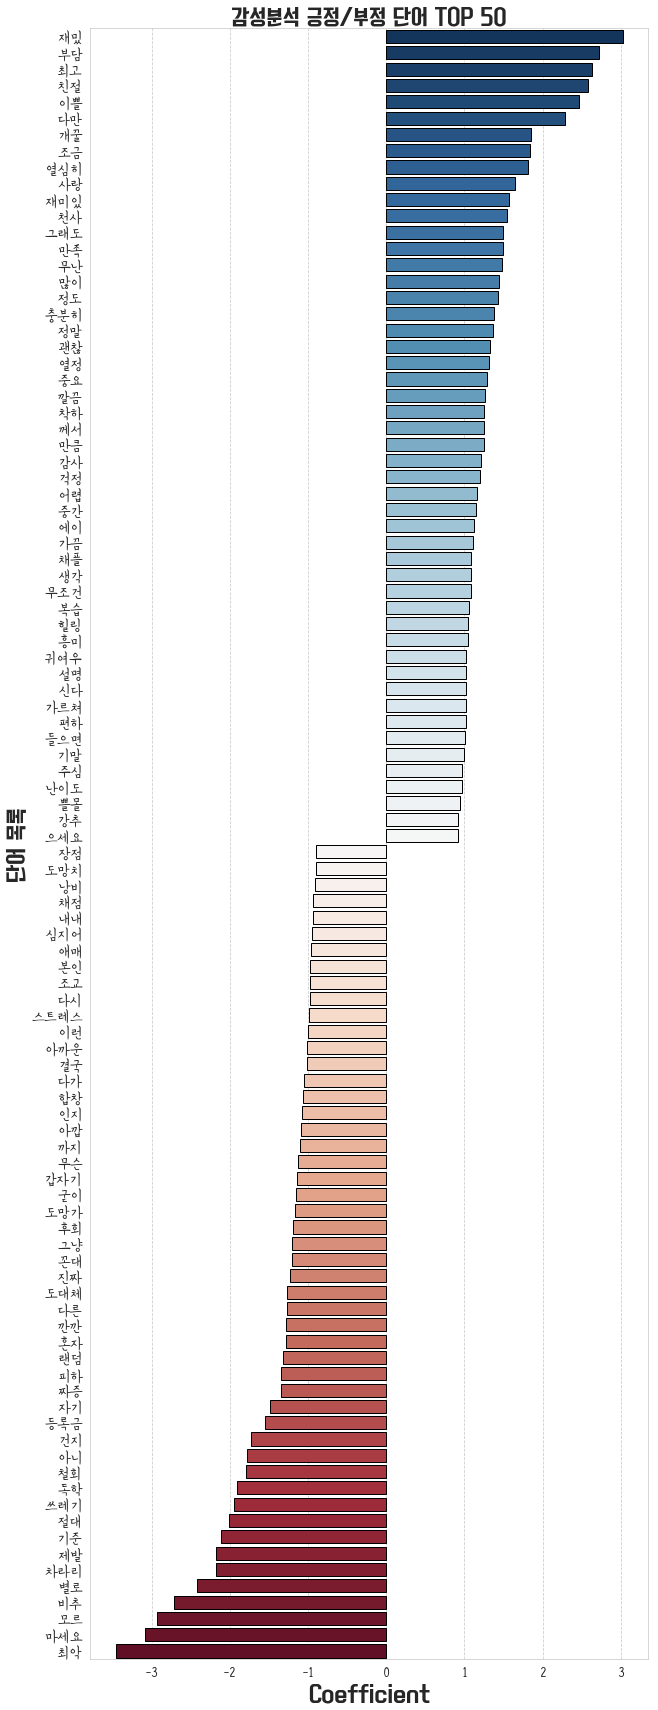

In [56]:
# 긍부정 단어 비교를 위한 barplot
# 많은 시각화 라이브러리 matplotlib, seaborn, plotly, shap...가 있지만
# 가장 일반적으로 사용하는 라이브러리는 역시 matplotlib, seaborn입니다. 
# 크게 중요한 부분은 아니지만..그래도 plot을 조금이나마 깔끔하게 그려보도록 합니다.

f, ax = plt.subplots(figsize = (10, 30))
ax.grid(axis = "x", linestyle = "--")

sns.barplot(x = "계수", y = "단어", data = df_word, ax = ax, palette = "RdBu_r", edgecolor = "black", linewidth = 1)

plt.title("감성분석 긍정/부정 단어 TOP 50", fontproperties = titleprop)
plt.xticks(fontproperties = fontprop)
plt.yticks(fontproperties = fontprop)
plt.xlabel("Coefficient", fontproperties = titleprop)
plt.ylabel("단어 목록", fontproperties = titleprop)

In [57]:
# DataFrame로 바꿔주기 전에 만들어놓은 list를 워드클라우드 시각화를 위해 Dictionary 타입으로 만들어줌
dict_po = dict(wc_list_po)
dict_ne = dict(wc_list_ne)

In [59]:
# 미설치시 ! pip install wordcloud
from wordcloud import WordCloud

In [60]:
# 시각화를 위한 워드클라우드 복습

# 마스크를 위한 이미지는 png파일로 그림을 제외한 배경이 투명해야합니다. (포토샵의 바둑판표시)
# 이미지 크기를 잘 조절해야 폰트가 깨지지 않는 선에서 글씨가 빼곡하게 들어갑니다! 
# plt의 colormap을 사용하여 원하는 색상을 지정해줄 수 있습니다.

from PIL import Image
import numpy as np
import random

icon = Image.open('positive.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.Blues

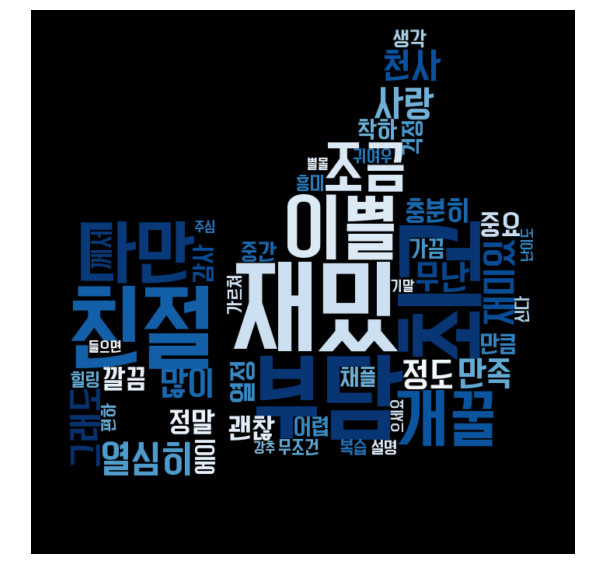

In [61]:
wc = WordCloud(font_path = 'wcfont.ttf',      # 폰트 지정 (본인이 원하는 폰트를 현재 디렉토리로 복붙하셔야합니다.) C:\Windows\Fonts에 있는 폰트를 복붙, 영어로 글꼴이름 변경
               mask = mask,                 # 위에서 만들어준 마스크 지정
               background_color = "black",  # 배경색 지정
               max_font_size = 120,         # 폰트사이즈지정 (그림을 구체화 시킬 때 사용합니다. 적당한 선을 본인 그림에 맞게 찾으셔야합니다.)
               margin = 0,                  # 토큰 사이사이의 빈 칸 크기 지정 (0이 가장 빼곡하므로 좋습니다.) 
               colormap = cmap)             # 위에서 지정한 plt의 colormap 지정 (본 워드클라우드는 이미지의 색을 따라가게 해놨으므로 적용되지 않습니다.)

cloud = wc.generate_from_frequencies(dict_po) # 빈도수를 활용하여 워드클라우드에 적용

plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation = "bilinear" )
plt.axis("off")
plt.show()
cloud.to_file('긍정.png')

In [62]:
from PIL import Image
import numpy as np
import random

icon = Image.open('negative.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.Reds

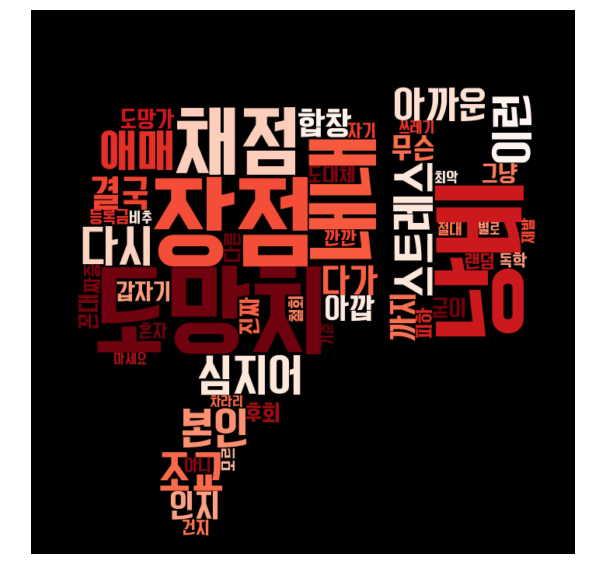

In [63]:
wc = WordCloud(font_path = 'font.ttf',      # 폰트 지정 (본인이 원하는 폰트를 현재 디렉토리로 복붙하셔야합니다.) C:\Windows\Fonts에 있는 폰트를 복붙, 영어로 글꼴이름 변경
               mask = mask,                 # 위에서 만들어준 마스크 지정
               background_color = "black",  # 배경색 지정
               max_font_size = 120,         # 폰트사이즈지정 (그림을 구체화 시킬 때 사용합니다. 적당한 선을 본인 그림에 맞게 찾으셔야합니다.)
               margin = 0,                  # 토큰 사이사이의 빈 칸 크기 지정 (0이 가장 빼곡하므로 좋습니다.) 
               colormap = cmap)             # 위에서 지정한 plt의 colormap 지정 (본 워드클라우드는 이미지의 색을 따라가게 해놨으므로 적용되지 않습니다.)

cloud = wc.generate_from_frequencies(dict_ne) # 빈도수를 활용하여 워드클라우드에 적용

plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation = "bilinear" )
plt.axis("off")
plt.show()
cloud.to_file('부정.png')

<img src="시각화.png" alt="주요옵션" style="width: 1200px;"/>